In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [176]:
data=pd.read_csv("./covid-data.csv")

In [177]:
databra=data[data.location=="Colombia"]

In [178]:
databra.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9464,COL,South America,Colombia,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,...,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.747
9465,COL,South America,Colombia,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,...,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.747
9466,COL,South America,Colombia,2020-03-07,1.0,1.0,NaN,0.0,0.0,NaN,...,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.747
9467,COL,South America,Colombia,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.747
9468,COL,South America,Colombia,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,...,13254.949,4.5,124.24,7.44,4.7,13.5,65.386,1.71,77.29,0.747


In [179]:
databra['date']=pd.to_datetime(databra["date"],format="%Y-%m-%d")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
databra=databra.sort_values(by='date')

In [221]:
df= databra[['date','new_cases','total_cases']]

In [191]:
df.head()

,date,new_cases,total_cases
9464,2020-03-05,NaN,NaN
9465,2020-03-06,NaN,NaN
9466,2020-03-07,1.0,1.0
9467,2020-03-08,NaN,NaN
9468,2020-03-09,NaN,NaN


In [192]:
df.columns=['fecha','nuevos','totales']

In [193]:
df.head()

,fecha,nuevos,totales
9464,2020-03-05,NaN,NaN
9465,2020-03-06,NaN,NaN
9466,2020-03-07,1.0,1.0
9467,2020-03-08,NaN,NaN
9468,2020-03-09,NaN,NaN


In [194]:
df=df.dropna()

In [195]:
df=df[df.nuevos>=20]

In [196]:
df.head()

,fecha,nuevos,totales
9478,2020-03-19,37.0,102.0
9479,2020-03-20,26.0,128.0
9480,2020-03-21,30.0,158.0
9481,2020-03-22,52.0,210.0
9482,2020-03-23,25.0,235.0


In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose

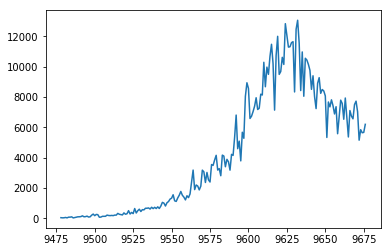

In [198]:
plt.plot(df.nuevos)

In [199]:
decomp=seasonal_decompose(df.nuevos,period=7,model='multiplicative')

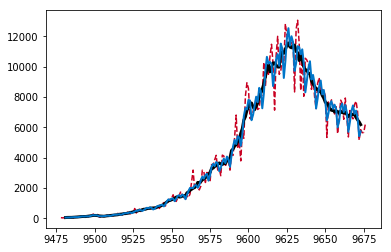

In [200]:
plt.plot(df.nuevos,c='#C90021',ls="--")
plt.plot(decomp.trend,c='k',linewidth=3)
plt.plot(decomp.trend*decomp.seasonal,c='#0076C9',linewidth=2)

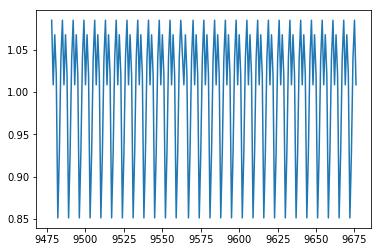

In [201]:
plt.plot(decomp.seasonal)

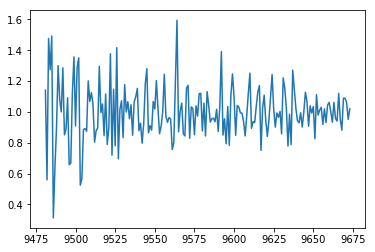

In [202]:
plt.plot(decomp.resid)

In [203]:
from scipy import fftpack #Fast Fourier Transform pack

In [204]:
# The FFT of the signal
npseas=np.array(decomp.seasonal)-np.mean(decomp.seasonal)
sig_fft = fftpack.fft(npseas)
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(npseas), d=1)

(0, 0.5)

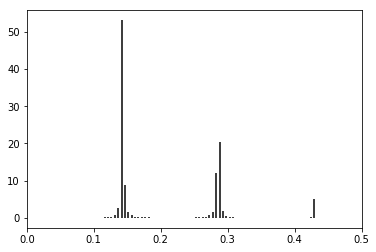

In [205]:
plt.vlines(sample_freq,0,power)
plt.xlim(0,0.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(0, 15)

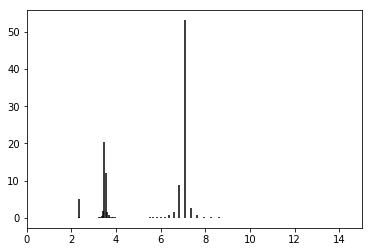

In [206]:
plt.vlines(1/sample_freq,0,power)
plt.xlim(0,15)

In [207]:
import statsmodels.graphics.tsaplots as sm

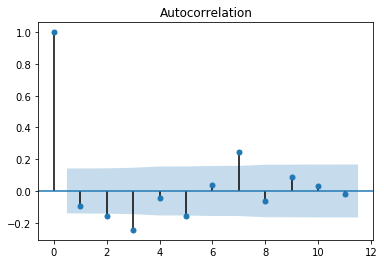

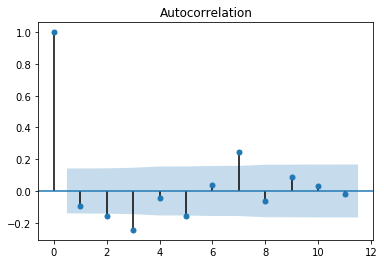

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4),sharex=True)
resid=np.array(decomp.resid)
resid=resid[~np.isnan(resid)]
sm.plot_acf(resid,lags=11,ax=ax)

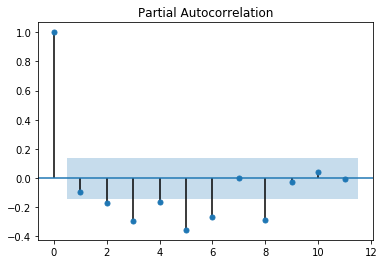

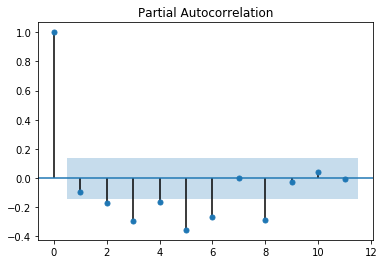

In [209]:
sm.plot_pacf(resid,lags=11)

In [210]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(endog=resid,order=((0,1,1),0,0))

In [211]:
fit=model.fit()
print(fit.summary())

                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                  192
Model:             ARIMA([2, 3], 0, 0)   Log Likelihood                  70.935
Date:                 Sat, 03 Oct 2020   AIC                           -133.870
Time:                         13:56:47   BIC                           -120.840
Sample:                              0   HQIC                          -128.593
                                 - 192                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9987      0.009    116.503      0.000       0.982       1.015
ar.L2         -0.1778      0.055     -3.256      0.001      -0.285      -0.071
ar.L3         -0.2703      0.053     -5.135 

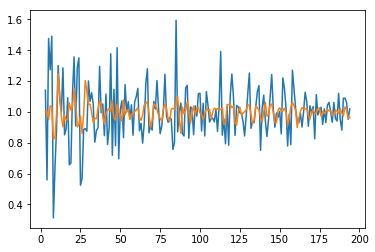

In [212]:
pred=fit.get_prediction()
mn=pred.predicted_mean
x=np.arange(0,len(decomp.resid))
plt.plot(x,decomp.resid)
x=x[~np.isnan(decomp.resid)]
plt.plot(x,mn)

In [213]:
from statsmodels.tsa.holtwinters import Holt,ExponentialSmoothing

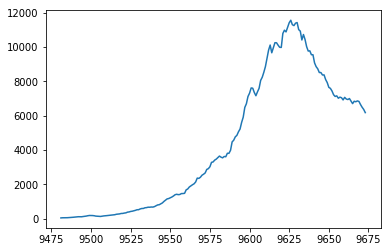

In [214]:
plt.plot(decomp.trend)
newtrend=decomp.trend.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


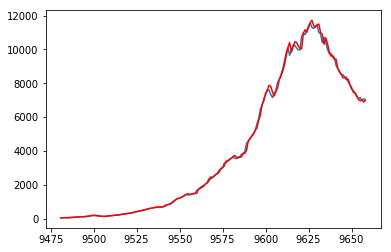

In [222]:
training=newtrend[:-15]
model=Holt(training)
res=model.fit(optimized=True)
plt.plot(training)
plt.plot(res.fittedvalues,c='r')

In [218]:
res.forecast(15)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


177    6955.691608
178    6871.544579
179    6787.397551
180    6703.250522
181    6619.103494
182    6534.956466
183    6450.809437
184    6366.662409
185    6282.515381
186    6198.368352
187    6114.221324
188    6030.074295
189    5945.927267
190    5861.780239
191    5777.633210
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


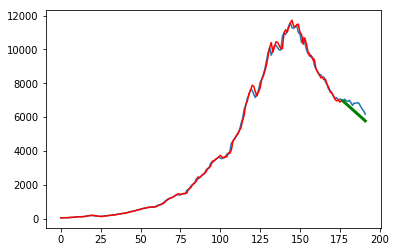

In [223]:
plt.plot(np.arange(0,len(newtrend)),newtrend)
plt.plot(np.arange(0,len(res.fittedvalues)),res.fittedvalues,c='r')
plt.plot(res.forecast(15),c='g',lw=3)